<a href="https://colab.research.google.com/github/pierre-brendan/PelotonIQ/blob/master/kmeans/kmeans_rider_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rider Clustering

In [0]:
## install the packages I need for this
# !pip install sklearn

In [0]:
# Mount drive to get cyclist links
from google.colab import drive
drive.mount('/content/drive')

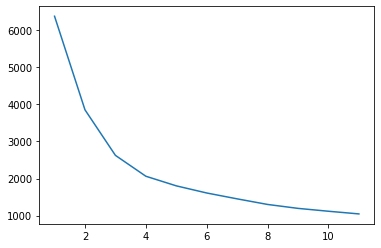

In [3]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# load the data
cycling_data = pd.read_csv('/content/drive/My Drive/cycling_data/rider_data.csv')
cycling_data = cycling_data[cycling_data['Rider'] != 'Bjorg Lambrecht ']
cycling_data = cycling_data[cycling_data['Rider'] != 'Robbert de Greef ']

# make a df without cyclist name in it for clustering
cycling_data.head()
d = cycling_data.drop(['Rider', 'Team', 'crawl_date'], axis=1)

# let's normalize the data
d['GC'] = preprocessing.scale(d['GC'])
d['Sprint'] = preprocessing.scale(d['Sprint'])
d['TT'] = preprocessing.scale(d['TT'])
d['Climber'] = preprocessing.scale(d['Climber'])
d['Classic'] = preprocessing.scale(d['Classic'])
d['Age'] = preprocessing.scale(d['Age'])

# let's go with 8 clusters to start
m = KMeans(8)
m.fit(d)

# Add to our data frame
d['Cluster'] = m.labels_

# join back to original data set on index
cycling_data2 = pd.merge(cycling_data, d, left_index=True, right_index=True)

# Review the data
#cycling_data2.head()

# Total errors and # of clusters
dist_points_from_cluster_center = []
K = range(1,12)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(d)
  dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)
# Elbow is at 2-4ish, might test 8 though
# 8 seems solid when I review the results


In [0]:
# Let's roll up the avg of of each attribute to see what the clusters made
#cycling_data2.head()
z = cycling_data2.groupby(['Cluster']).mean()
cycling_data2.to_csv('test_data.csv', index=False)

# Conclusions

Generally results are solid given the inputs. There is one cluster that has a ton of meh riders in it but also serious up and coming riders. I think adding stage wins, classic wins and GC wins will make this clustering project much more accurate.

Once I have those fields, I will revosts this project and update it.